# 数据集上的分布可视化

面对一个数据集，我们首先要做的事情是理解变量是如何分布的。seaborn中提供了一些一元变量和二元变量分布的可视化方法。

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(color_codes=True)

## 一元变量分布的可视化

### 直方图

seabron中查看医院变量分布最简单的方法是使用distplot函数绘图。默认情况下该函数会绘制一个直方图并拟合密度估计。

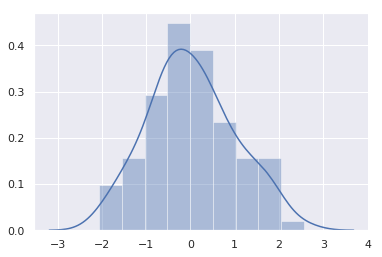

In [2]:
x = np.random.normal(size=100)
sns.distplot(x)

通过kde参数可以禁用核密度估计，rug参数可以在直方图上绘制轴须图（rug plot）。

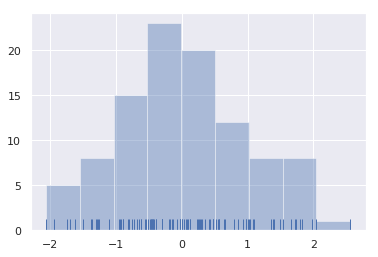

In [3]:
sns.distplot(x,kde=False,rug=True)

seaborn中通过默认方推断最优的区间数量，但如果改变区间的数量，数据可能会展现出不同的特征。

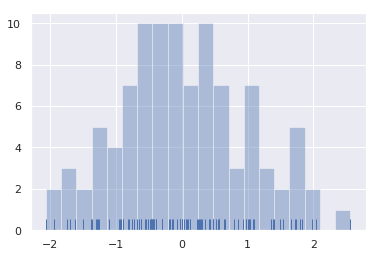

In [4]:
sns.distplot(x, bins=20, kde=False, rug=True)

### 核密度估计图

核密度估计图并不如直方图那么常见，但它是一个很好的刻画分布形状的工具。

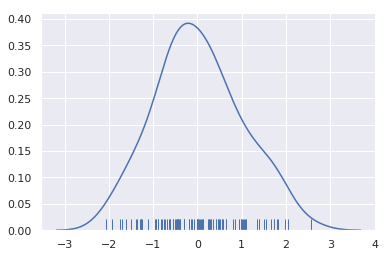

In [5]:
sns.distplot(x, hist=False, rug=True)

绘制和密度估计图比绘制直方图需要更多的计算量。首先，以每个变量为中心绘制正态分布曲线。

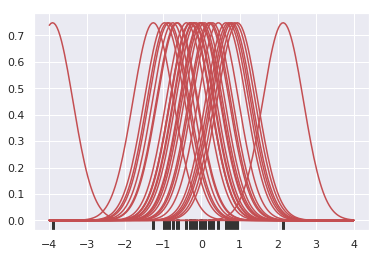

In [6]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3)

然后计算每个点处各个密度曲线的和，并对最终的曲线进行归一化，保证其下面积为1

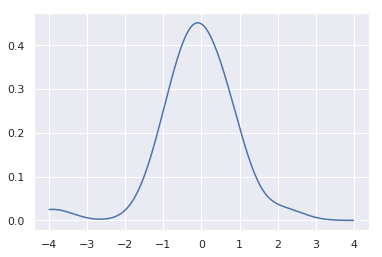

In [7]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density);

如果直接调用kdeplot函数也可以得到相同的曲线。distplot函数底层调用的就是kdeplot，但是distplot函数提供了更简单易用的接口。

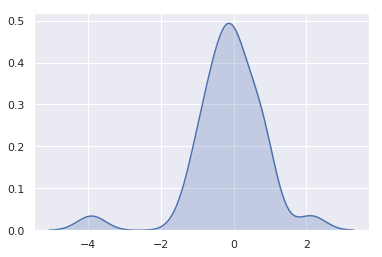

In [8]:
sns.kdeplot(x, shade=True)

bw参数和直方图的bins参数类似。它控制核密度曲线的宽度。默认情况下seaborn自动寻找最佳的值，但也可以手动调整。

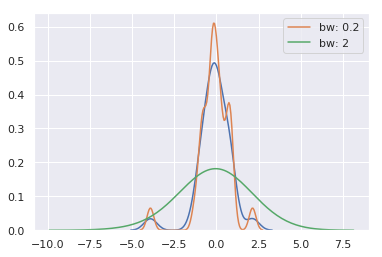

In [9]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend()

高斯核密度估计处理过程可能会导致最大值超出数据集的极值，cut参数可以用来控制曲线超出极值的范围，但是它仅影响图形绘制并不影响如何拟合。

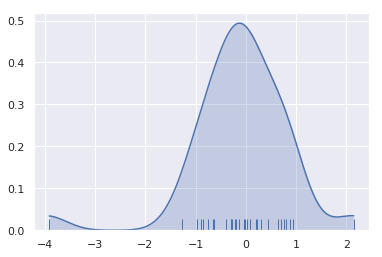

In [10]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x)

### 拟合参数化分布

distplot函数可以拟合参数化分布，从视觉角度评估数据集的分布与相应分布的相似程度。

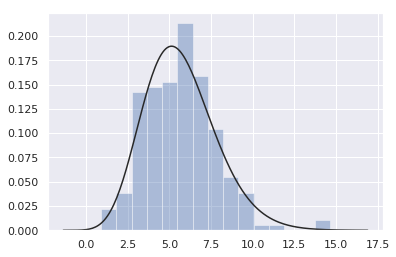

In [11]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)

## 二元分布图的绘制

seaborn中使用jointplot函数会创建多个面板，用于绘制二元变量分布，并在各个轴上分别绘制一元变量的分布。

In [12]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

### 散点图

散点图是最常用的二元变量分布图。

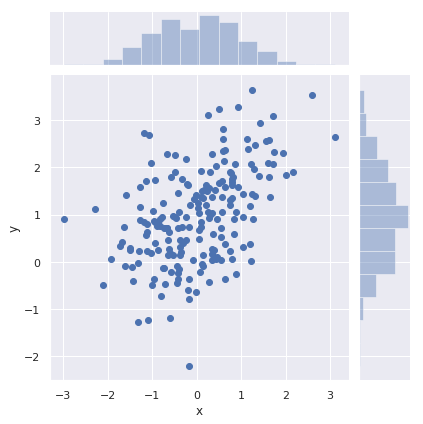

In [13]:
sns.jointplot(x="x", y="y", data=df)

### Hexbin图

方图的双变量类比称为“hexbin”图，因为它显示了六边形区间内的观察计数。Hexbin图非常适用于较大的数据集

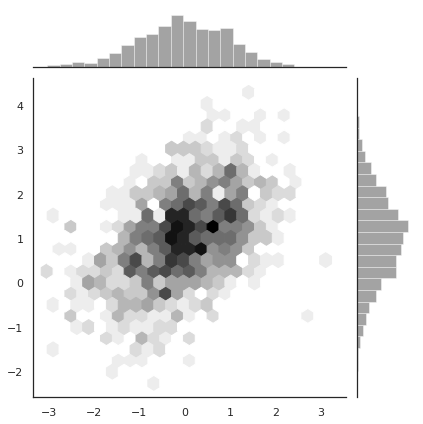

In [14]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")

### 核密度估计

同样也可以用核密度估计来描述二元变量分布。

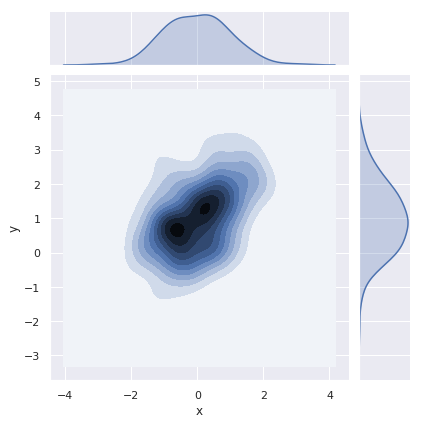

In [15]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

也可以通过kdeplot函数来绘制二元变量核密度估计图，这种方式允许多种图形叠加在一起。

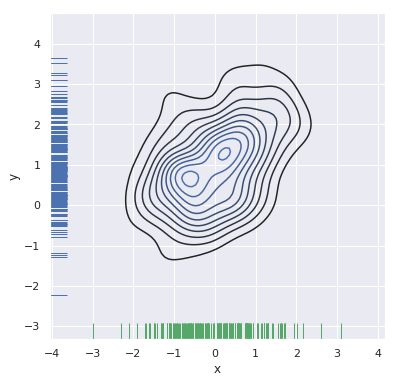

In [16]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax)

如果希望二元变量密度图看起来更加连续，可以增加等值线的等级。

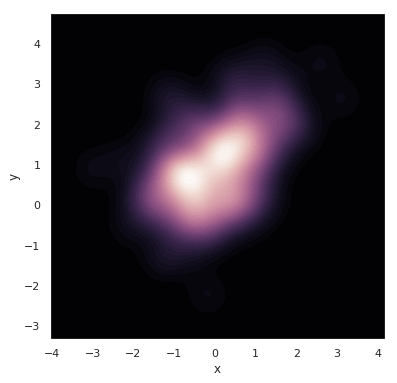

In [17]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True)

joinplot函数使用JoinGrid来管理图像。通过joinplot函数返回的JoinGrid对象可以对图像进行更加灵活的设置。

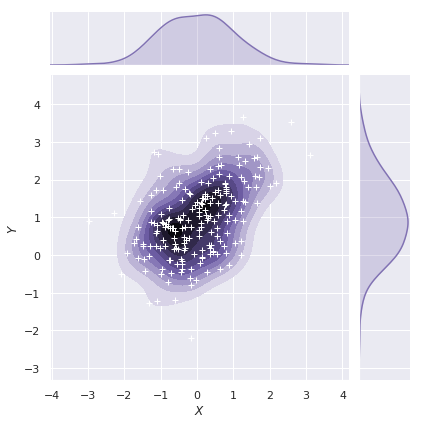

In [18]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")

## 可视化数据集中变量两两之间的关系

pairplot用于绘制数据集中变量两两之间的关系。默认情况下对角线上绘制一元变量的直方图。

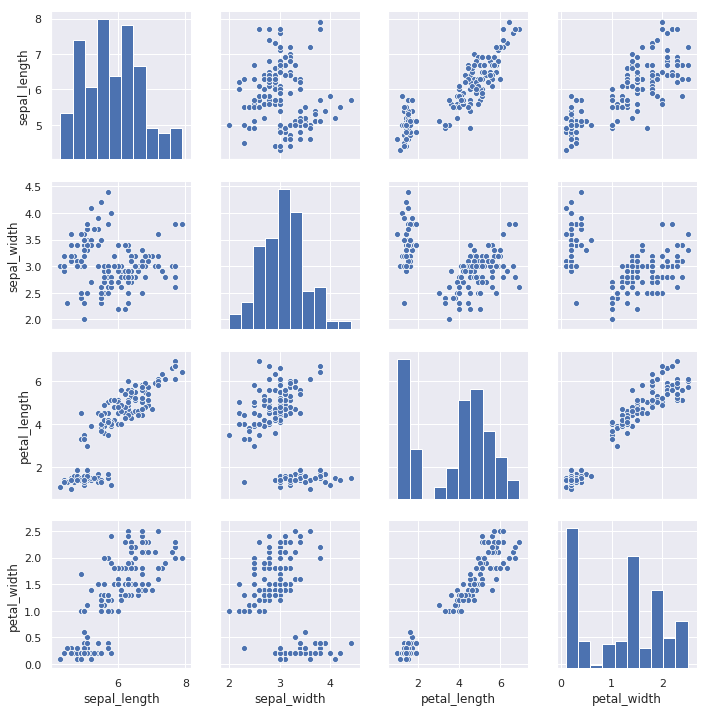

In [19]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)

与joinplot和JoinGrid之间的关系一样，pairplot函数时构建在PairGrid对象之上的，可以对PairGrid对象做更多灵活的设置。

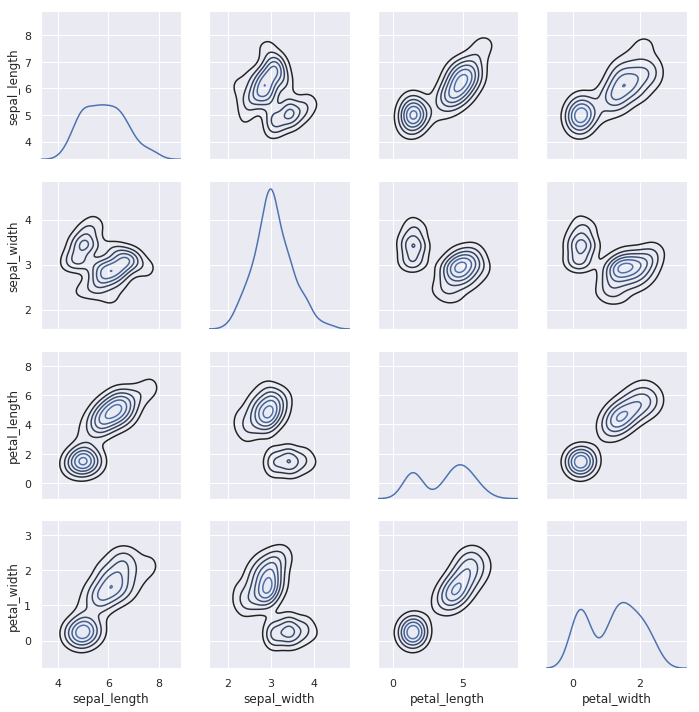

In [20]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)